# Fundamentals of Data Analysis - Project

## Introduction
This document contains my research and data analysis of the Tips Data Set using the Python programming language.

## Table of Contents

- [1. Data Set Information](#info)
    - [1.1 About This Data Set](#about)
    - [1.2 Libraries](#library)
    - [1.3 Loading Data](#load)
- [2. Data Set Description](#description)
    - [2.1 First and Last DataFrame Rows](#first)
    - [2.2 Clean Up Column Names](#clean)
    - [2.3 Add New Column to The Data Set to Show Tip%](#add)
    - [2.4 Add New Column Showing Day as Numeric Value](#day)
    - [2.5 Summary Statistics](#summary)
    - [2.6 Data Profile](#profile)
- [3. Data Set Analysis](#analysis)
    - [3.1 Group By Operations](#group)
    - [3.2 Hierarchical Indexing](#index)
    - [3.3 Pivot Tables](#pivot)
    - [3.4 Plots](#plot)
        - [3.4.1 Histogram](#histogram)
        - [3.4.2 Pairplot](#pairplot)
        - [3.4.3 Catergrical Scatterplot](#scatterplot)
- [4. Linear Regression](#linear)
    - [4.1 Simple Linear Regression](#simple)
    - [4.2 Regression Analysis](#regression)
- [5. References](#references)


## 1. Data Set Information <a id='info'></a>

### 1.1 About This Data Set <a id='about'></a>
According to Eargle (2016) this data set appeared in a collection of case studies "Practical Data Analysis: Case Studies in Business Statistics, Bryant & Smith 1995". The data set consists of details of 244 tips which were recorded by a waiter which he received over while working in one restaurant. The waiter recorded the following details of each tip received:

Details:
* total bill in dollars 
* tip in dollars
* sex of the bill payer - i.e. Male or Female
* whether there were any smokers in the party - i.e Yes or No
* day of the week - i.e. Thur, Fri, Sat, Sun 
* time of day - ie Lunch or Dinner
* size of the party

### 1.2 Libraries <a id='library'></a>

In [1]:
# Import libraries which will be used in this notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.3 Loading Data <a id='load'></a>

In [2]:
# Load the tips dataset from a URL using read_csv function into dataframe called df
# adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python and McLoughlin (2019)
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
# Display the dataframe
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


![Image of EDA](https://miro.medium.com/max/1918/1*g-cO4ZRMvjhA2o8T0jkAsw.png)

## 2.0 Data Set Description <a id='description'></a>

By loading the data set and displaying the dataframe, it's possible to determine some basic details of the dataset as follows: 

* The tips data set is a comma-separated values (csv) file with 244 records (rows of data) and 7 fields (columns).
* Each record (row of data) is located on a separate line, delimited by a line break. 
* The first line of the file is the header line. 
* The header line contains the names of the 7 fields: "total_bill","tip","sex","smoker","day","time","size".
* The fields of data in the header line and each record (row) are delimited with a comma. 
* Each row or data is indexed, the index is shown in the column on the left, but the index is not part of the dataset itself.


### 2.1 First and Last DataFrame Rows <a id='first'></a>

Having established some basic details about the tips data set, Willems (2017) suggests that its good idea to take a closer look at the data itself. I used the pandas head() and tail() functions take a look the first and last lines of the data set to see if there was anything unusual.

In [3]:
# Inspect the first 5 rows - adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Inspect the last 5 rows - adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### 2.2 Clean Up Column Names <a id='clean'></a>

The results of the review of the data contained in the first and last dataFrame rows are as follows:

* In the main, the values listed under each column, appear to be consistent with the column names. 
    * Numerical values are found in columns where you would expect to find them, i.e. total_bill, tip and size
    * There are string values consistent with column names;  sex & smoker
* The columns labelled 'day' and time have string values instead of datetime values, which might be expected.
* I found that the column names are confusing. As suggested by Bundock (2019) I decided to rename the columns to make them clearer.
* The Days column contains string values, which limits the kind of analysis you can do with as it is categorical rather than numerical data, therefore as suggested by Bundock (2019) I decided to create a new column called Day Number which converts the string values into number, e.g. Sunday will be converted into Day Number 7.


In [5]:
# Rename the columns - adapted from https://stackoverflow.com/a/11354850
# I used the df.rename() function and then I listed the columns to be renamed 'oldname' : 'newname'. 
df = df.rename(columns={'total_bill': 'Total Bill', 'tip': 'Tip','sex': 'Gender', 'smoker': 'Smoker', 'day': 'Day', 'time': 'Mealtime', 'size': 'Party Size'})
# Displays first five rows and the column names 
df.head()

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The columns have been successfully renamed.

### 2.3 Add New Column to The Data Set to Show Tip% <a id='add'></a>
In the US, it is expected to tip 15 to 20% of the total bill. The tip % is not shown in the dataset, so as suggested by Bundock (2019), I decided to add a column to show the tip as a percentage of the total bill.

In [6]:
# Create a new column in dataframe called tip% which is calcualted by dividing value in tip column by value in total bill column
#Solution adapted from https://stackoverflow.com/a/36619736
df['Tip%'] = df['Tip']/df['Total Bill']
df.head() # display first five rows

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


The new columns named Tip% is added to the dataset, which now consist of 244 rows and 8 columns.

### 2.4 Add New Column Showing Day as Numeric Value <a id='day'></a>
day3=Thur, 4=Fri, 5=Sat, 6=Sun

In [7]:
# Create a new column in dataframe called Day Number which  
#Solution adapted from https://stackoverflow.com/a/36619736
df['Day Number'] = df['Day']
df.head() # display first five rows

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,Sun
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,Sun
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,Sun
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,Sun
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,Sun


In [8]:
# Use dataframe replace to replace string value with numeric value in Day Number column - 
# Adapted from https://stackoverflow.com/a/17115229

# Define mapping between strings and number values 
mapping = {'Thur':4, 'Fri':5, 'Sat':6, 'Sun':7}
# create new dataframe called df2 and use df.replace to replace values in Day Number column using mapping 
df2 = df.replace({'Day Number': mapping})
# display a sample 5 rows displaying new column 'Day Number'
df2.sample(5)

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
164,17.51,3.00,Female,Yes,Sun,Dinner,2,0.171331,7
228,13.28,2.72,Male,No,Sat,Dinner,2,0.204819,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812,6
144,16.43,2.30,Female,No,Thur,Lunch,2,0.139988,4
25,17.81,2.34,Male,No,Sat,Dinner,4,0.131387,6


### 2.5 Summary Statistics <a id='summary'></a>
I used the pandas describe() function to get summary statistics such as the count, mean, standard deviation, minimum and maximum values and the quantiles of the data. Willems (2017) suggests that these descriptive statistics help to profile the data and assess the data quality. This step will help to determine if you need to correct, discard or find an alternative approach to deal with the data. 

In [9]:
# Use the describe() function to display summary statistics
# Adapted from https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python
df.describe()

,Total Bill,Tip,Party Size,Tip%
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


### 2.6 Data Profile <a id='profile'></a>

I used the results of the describe() function to begin to assemble a profile or shape of the data distribution.

* The mean value for total_bill is 19.785943, when you compare this value with the median value 17.795. This suggests that the mean is not a typical value and may be skewed. Glen (2014) states that if the mean is greater than the median, the distribution is right-skewed (positively skewed). To investigate this further, I will plot the distribution to see whether this positive skewness is significant.
* The mean value for tip is 2.998279, when you compare this value with the median value 2.90, it suggests that the mean is a typical value and thus the distribution is normal.
* The mean value for size is 2.569672, when you compare this value with the median value 2. This suggests that the mean is not a typical value and the distribution may be positively skewed and further investigation is needed.
* The mean value for tip % is .159518, when you compare this value with the median value 1.55, it suggests that the mean is a typical value and thus the distribution is normal.

To investigate this further, I decided to select subsets categorizing the results based on mealtime.  

In [10]:
# Display Summary Statistics for time = Dinner
# Adapted from McLoughlin (2019) 
(df.loc[df.loc[:, 'Mealtime'] == 'Dinner']).describe()

,Total Bill,Tip,Party Size,Tip%
count,176.000000,176.000000,176.000000,176.000000
mean,20.797159,3.102670,2.630682,0.159518
std,9.142029,1.436243,0.910241,0.067477
min,3.070000,1.000000,1.000000,0.035638
25%,14.437500,2.000000,2.000000,0.123192
50%,18.390000,3.000000,2.000000,0.155400
75%,25.282500,3.687500,3.000000,0.188209
max,50.810000,10.000000,6.000000,0.710345


In [11]:
# Display Summary Statistics for time = Lunch
# Adapted from McLoughlin (2019)
(df.loc[df.loc[:, 'Mealtime'] == 'Lunch']).describe()

,Total Bill,Tip,Party Size,Tip%
count,68.000000,68.000000,68.000000,68.000000
mean,17.168676,2.728088,2.411765,0.164128
std,7.713882,1.205345,1.040024,0.040242
min,7.510000,1.250000,1.000000,0.072961
25%,12.235000,2.000000,2.000000,0.139147
50%,15.965000,2.250000,2.000000,0.154084
75%,19.532500,3.287500,2.000000,0.193917
max,43.110000,6.700000,6.000000,0.266312


## 3.0 Data Set Analysis <a id='analysis'></a>



### 3.1 Group By Operations <a id='group'></a>

Pandas dataframe.groupby() function is used to split the data into groups based on some criteria (geeksforgeeks.org, 2019). By using Pandas groupby function it is possible to investigate whether the mean tip values change much depending on the attributes. 

So I decided to investigate the data set by using the following groupings.
* sex of the bill payer - i.e. Male or Female
* whether there were any smokers in the party - i.e Yes or No
* day of the week - i.e. Thur, Fri, Sat, Sun
* time of day - ie Lunch or Dinner
* size of the party
I grouped attributes in pairs to make it more efficient to review the data set to identify results which might lead to further investigation later.


In [12]:
# Investigate if there in much difference in tips by gender and whether there was a smoker in the party or not
# use groupby function to group mean by Gender and smoker for each column Total Bill, Tip, Party Size and Tip %
# Adapted from McKinney 2019
means1 = df.groupby(['Gender','Smoker']).mean()
means1 # Print result

Total Bill       Tip  Party Size      Tip%
Gender Smoker                                            
Female No       18.105185  2.773519    2.592593  0.156921
       Yes      17.977879  2.931515    2.242424  0.182150
Male   No       19.791237  3.113402    2.711340  0.160669
       Yes      22.284500  3.051167    2.500000  0.152771

The results show that there are some difference between male and female, smoker and non smoker across all columns. These relationships should be investigated further.

In [13]:
# Investigate if there in much difference in tips by day of week and mealtime
# Adapted from McKinney 2019
# use groupby function to group mean by Day and Mealtime for each column Total Bill, Tip, Party Size and Tip %
means2 = df.groupby(['Day', 'Mealtime']).mean()
means2 # Print result


Total Bill       Tip  Party Size      Tip%
Day  Mealtime                                            
Fri  Dinner     19.663333  2.940000    2.166667  0.158916
     Lunch      12.845714  2.382857    2.000000  0.188765
Sat  Dinner     20.441379  2.993103    2.517241  0.153152
Sun  Dinner     21.410000  3.255132    2.842105  0.166897
Thur Dinner     18.780000  3.000000    2.000000  0.159744
     Lunch      17.664754  2.767705    2.459016  0.161301

The results show that there are some differences between day and mealtime across all columns. These relationships should be investigated further.
Lets start by investigating whether there is much difference in the number of tips recorded by day of week and mealtime.

In [14]:
# Investigate if there in much difference in the number of tips recorded by day of week and mealtime
# use groupby function to group count by Day and Mealtime for each column Total Bill, Tip, Party Size and Tip %
counts = df.groupby(['Day', 'Mealtime']).count() # # Adapted from McKinney 2019
counts # Print result

Total Bill  Tip  Gender  Smoker  Party Size  Tip%  Day Number
Day  Mealtime                                                               
Fri  Dinner            12   12      12      12          12    12          12
     Lunch              7    7       7       7           7     7           7
Sat  Dinner            87   87      87      87          87    87          87
Sun  Dinner            76   76      76      76          76    76          76
Thur Dinner             1    1       1       1           1     1           1
     Lunch             61   61      61      61          61    61          61

The results show a wide variation in the number of tips recorded by day and mealtime. This suggests that the pattern of day and mealtime isnt random, reflecting the waiters shift schedule. As the waiter is more likely to work the lunchtime shift on Thursdays and the dinner shift on Saturday and Sunday. Therefore, it may not be possible to clearly establish any relationship between day and or meatime with tips as the dataset is biased based on one workers shift schedule. More data is needed on tips recorded by other waiters working other shift patterns in order to draw any reliable conclusions if tips are related to day or mealtime.

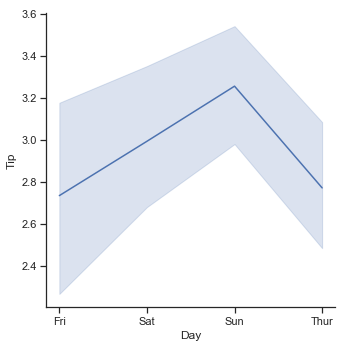

In [50]:
# Plot the relation graph between tip and day using sns.relplot function
# Adapted from https://amitkushwaha.co.in/data-visualization-part-1.html
sns.relplot('Day', 'Tip', data=df, kind='line')

In [15]:
# Investigate if there in larger groups tip better
# use groupby function to group mean by Party Size for the following columns Total Bill, Tip, Party Size and Tip %
means_size = df.groupby('Party Size').mean() # Adapted from McKinney 2019
means_size # print result

,Total Bill,Tip,Tip%
Party Size,,,
1,7.242500,1.437500,0.217292
2,16.448013,2.582308,0.165719
3,23.277632,3.393158,0.152157
4,28.613514,4.135405,0.145949
5,30.068000,4.028000,0.141495
6,34.830000,5.225000,0.156229


The results show that as party size increases, there is a corresponding increase in Total Bill and Tip, however Tip% declines when party size increases from 1 to 5. The Tip% increases for party size of 6, which is something that might be worth investigating further. 

Lets start by looking at the count of tips by party size to see how many tips were given from party size of 6.

In [16]:
# Investigate if the number of tips recorded by group size
# Adapted from McKinney 2019
# use groupby function to group by Party Size for each column Total Bill, Tip, Party Size and Tip %
count = df.groupby('Party Size').count()
count # print result

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Tip%,Day Number
Party Size,,,,,,,,
1,4,4,4,4,4,4,4,4
2,156,156,156,156,156,156,156,156
3,38,38,38,38,38,38,38,38
4,37,37,37,37,37,37,37,37
5,5,5,5,5,5,5,5,5
6,4,4,4,4,4,4,4,4


There is a wide variation in party size. The tips data on party sizes less than 2 and more than 4 is a very small population. Therefore it may be useful to get more samples of tips in this range in order to draw more reliable conclusions.

To complete this line of investigation, I decided to investigate if relationship between day and party size on tip%.

### 3.2 Hierarchical Indexing <a id='index'></a>

In [17]:
# Investigate if relationship between day and party size on tip%.
# Adapted from McKinney 2019
# use groupby function to group mean by Day & Party Size for the following columns Total Bill, Tip, Party Size and Tip %
# Unstack displays Party Size in columns
means_day_size = df.groupby(['Day','Party Size']).mean()
means_day_size.stack().unstack('Party Size')

Party Size               1          2          3          4          5  \
Day                                                                      
Fri  Total Bill   8.580000  16.321875  15.980000  40.170000        NaN   
     Tip          1.920000   2.644375   3.000000   4.730000        NaN   
     Tip%         0.223776   0.168693   0.187735   0.117750        NaN   
Sat  Total Bill   5.160000  16.837170  25.509444  29.876154  28.150000   
     Tip          1.000000   2.517547   3.797778   4.123846   3.000000   
     Tip%         0.231832   0.155289   0.151439   0.138289   0.106572   
Sun  Total Bill        NaN  17.560000  22.184000  26.688333  27.000000   
     Tip               NaN   2.816923   3.120667   4.087778   4.046667   
     Tip%              NaN   0.180870   0.152662   0.153168   0.159839   
Thur Total Bill  10.070000  15.156875  19.160000  29.950000  41.190000   
     Tip          1.830000   2.442500   2.692500   4.218000   5.000000   
     Tip%         0.181728   0.163935   0.144599   0.145515   0.121389   

Party Size               6  
Day                         
Fri  Total Bill        NaN  
     Tip               NaN  
     Tip%              NaN  
Sat  Total Bill        NaN  
     Tip               NaN  
     Tip%              NaN  
Sun  Total Bill  48.170000  
     Tip          5.000000  
     Tip%         0.103799  
Thur Total Bill  30.383333  
     Tip          5.300000  
     Tip%         0.173706

The results show the following
* For Party Size of 1, the highest average tip was received on Friday, but highest mean tip% was Saturday.
* For Party Size of 2, the highest average tip was received on Sunday, but highest mean tip% was Sunday.
* For Party Size of 3, the highest average tip was received on Saturday, but highest mean tip% was Friday.
* For Party Size of 4, the highest average tip was received on Friday, but highest mean tip% was Sunday.
* For Party Size of 5, the highest average tip was received on Thursday, but highest mean tip% was Sunday.
* For Party Size of 6, the highest average tip was received on Thursday,but highest mean tip% was Thursday.

### 3.3 Pivot Tables <a id='pivot'></a>

In [18]:
# Create pivot table compare tips by day and mealtime and gender

# Import 'numpy' as np
import numpy as np
# create a pivot table to display mean tip by sex using days a nested index of day & time 
# Code adapted from https://towardsdatascience.com/python-for-data-science-from-scratch-part-ii-e4dd4b943aba
mean_tips = pd.pivot_table(df,values = 'Tip', index=['Day', 'Mealtime'],columns='Gender', aggfunc=np.mean)
mean_tips

Gender           Female      Male
Day  Mealtime                    
Fri  Dinner    2.810000  3.032857
     Lunch     2.745000  1.900000
Sat  Dinner    2.801786  3.083898
Sun  Dinner    3.367222  3.220345
Thur Dinner    3.000000       NaN
     Lunch     2.561935  2.980333

The results suggest that there is no clear trend indicating which gender is the better tipper. While the pivit table function can show several semantic variables at once, it’s not always effective to do so. Waskom (2018) suggest that a better approach is to understand the relationship between two variables depends on more than one other variable, is to make may be to make more than one plot. Thus I decided to use the Seaborn relplot() function to visualize the relationship between Tip, Total Bill, Gender and Meatime.

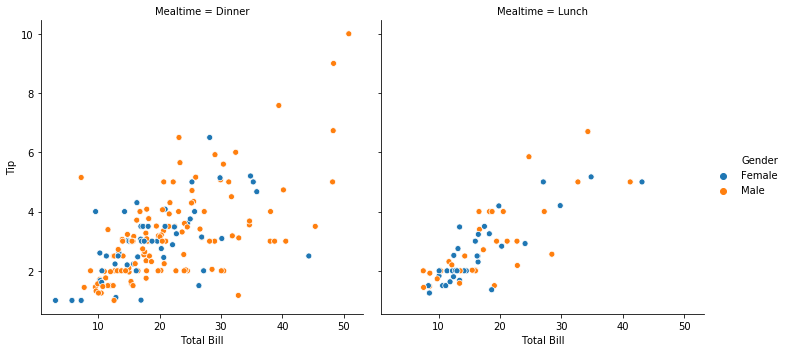

In [19]:
# Use default relpot = scatter, to plot x & y, using hue and col to show subsets of the data.
# adapted from https://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="Total Bill", y="Tip", hue="Gender",
            col="Mealtime", data=df);

Heteroscedasticity is a hard word to pronounce, but it doesn't need to be a difficult concept to understand. Put simply, heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it. (Statsmakemecry.com (2012))

A scatterplot of these variables will often create a cone-like shape, as the scatter (or variability) of the dependent variable (DV) widens or narrows as the value of the independent variable (IV) increases. The inverse of heteroscedasticity is homoscedasticity, which indicates that a DV's variability is equal across values of an IV.

### 3.4 Plots <a id='plot'></a>

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt


#### 3.4.1 Histogram <a id='histogram'></a>
Create a simple histogram to show the distribution of tip values and tip %.

<function matplotlib.pyplot.show(*args, **kw)>

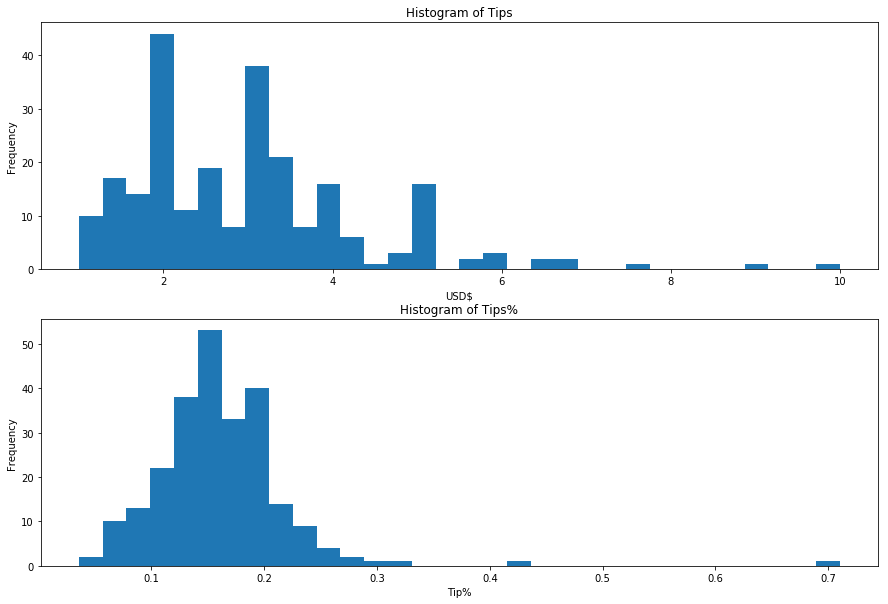

In [21]:
# Resize Plot to creates a figure with 15 (width) x 10 (height) inches - Adapted from https://stackoverflow.com/a/36368418
plt.figure(figsize=(15,10))
# Use subplot to compare the distribution of Total_Bill and Tips adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis/data
# Plot first subplot on first row of grid which contains grid 2 rows x 1 columns
plt.subplot(2,1,1)
x = (df.loc[:, 'Tip'])
plt.hist(x, bins=32)
plt.xlabel('USD$')
plt.ylabel('Frequency')
plt.title(r'Histogram of Tips')
# Plot 2nd subplot on second row of grid which contains 2 rows x 1 column 
plt.subplot(2,1,2)
y = (df.loc[:, 'Tip%'])
plt.hist(y, bins=32)
plt.xlabel('Tip%')
plt.ylabel('Frequency')
plt.title(r'Histogram of Tips%')
plt.show

##### Interpretation of Results
* A quick look at the histogram suggests that that there may be some outliers in the dataset, where the tip% is greater than 40%

In [22]:
# create a dataframe called outlier by extracting rows from the df dataframe where the values in Tip% column are greater than 0.4
outlier = (df.loc[df.loc[:, 'Tip%'] > 0.4]) # Adapted from McLoughlin (2019)
# Display outlier array
outlier
# Display 2 rows of data which may contain potential outliers

,Total Bill,Tip,Gender,Smoker,Day,Mealtime,Party Size,Tip%,Day Number
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345,Sun
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667,Sun


In [23]:
# Drop outliers and create new dataframe df3
# Adapted from https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/
df3 = df.drop([df.index[172],df.index[178]]) # drop index rows 172 & 178
# Generate summary statistics for dataframe df3 
df3.describe()

,Total Bill,Tip,Party Size,Tip%
count,242.000000,242.000000,242.000000,242.000000
mean,19.879835,2.985248,2.574380,0.157474
std,8.878018,1.380868,0.953615,0.047169
min,3.070000,1.000000,1.000000,0.035638
25%,13.397500,2.000000,2.000000,0.128538
50%,17.815000,2.855000,2.000000,0.154084
75%,24.222500,3.507500,3.000000,0.189956
max,50.810000,10.000000,6.000000,0.325733


##### Interpretation of Results
* A quick look at the histogram suggests that that there may be some outliers in the dataset, where the tip% is greater than 40%

#### 3.4.2 Pairplot <a id='pairplot'></a>

C:\Users\SESA87346\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


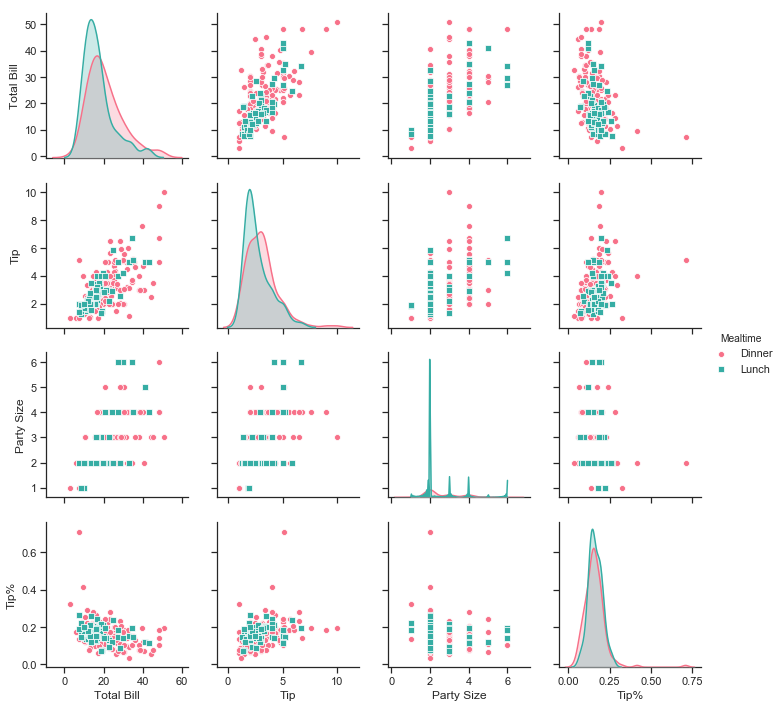

In [24]:
# Import Seaborn Library 
# adapted from https://www.datacamp.com/community/tutorials/seaborn-python-tutorial#load
import seaborn as sns
# Seaborn does not have a default style, instead it comes with 5 preset styles, which must be called
# I am using seaborn themes: ticks, as it is commonly used to give extra structure to the plots https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set(style="ticks")
# Construct scatterplot using pairplot function - adapted from https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Hue is used to display lunch and Dinner in a different color (Series = "Mealtime").
# Palette ="husl" used to change color palette to husl instead of default. ref: https://seaborn.pydata.org/tutorial/color_palettes.html
# markers=["o", "s", "D"] are used to display different markers for each level of the hue variable:
sns.pairplot(df, hue='Mealtime', palette="husl", markers=["o", "s"])

#### 3.4.3 Categorical Scatterplot <a id='scatterplot'></a>

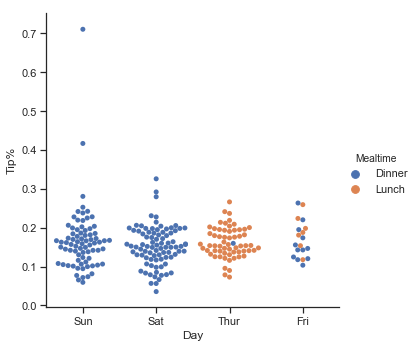

In [25]:
# Test if there is an association between day and time. Are customers really more likely to come in at lunch during the week, and dinner on the weekends?
# Use catplot to plot the relationship between tip % and day (Categorical Variable). 
# kind = swarm - converts catplot into swarmplot
# Use “mealtime” as the color to see the relationship between tip % and day split by mealtime. 

sns.catplot(x='Day', y='Tip%', hue='Mealtime', kind="swarm", data=df);


#### Interpretation of Results
* The swarmplot shows the shift pattern of the waiter. The waiter is more likely to work the lunchtime shift on Thursdays and , and dinner shift on the weekends.
* It is possible to infer from the swarmplot, that distribution of tip% on Saturday is different to Sunday and Thursday
* There appears to be little difference between Mealtimes (ie Lunch and Dinner) on tip%.

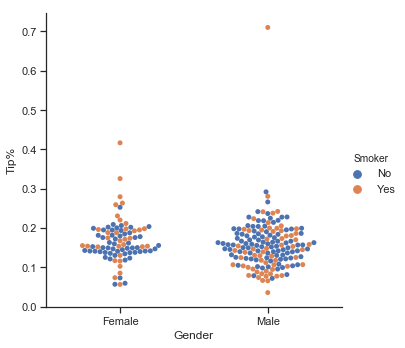

In [26]:
# Test if there is an association between gender and tip%. Are females better tippers? Do smokers tip with better ratios?
# Use catplot to plot the relationship between tip % and gender (Categorical Variable). 
# kind = swarm - converts catplot into swarmplot
# Use “Smoker” as the color to see the relationship between tip % and gender split by smoker. 

sns.catplot(x='Gender', y='Tip%', hue='Smoker', kind="swarm", data=df);

#### Interpretation of Results
* Based on the swarmplot, the bill payer is more likely to be male than female.
* It is possible to infer from the swarmplot, females tip% is greater than males. 
* Smokers are appear to tip more than non-smokers.

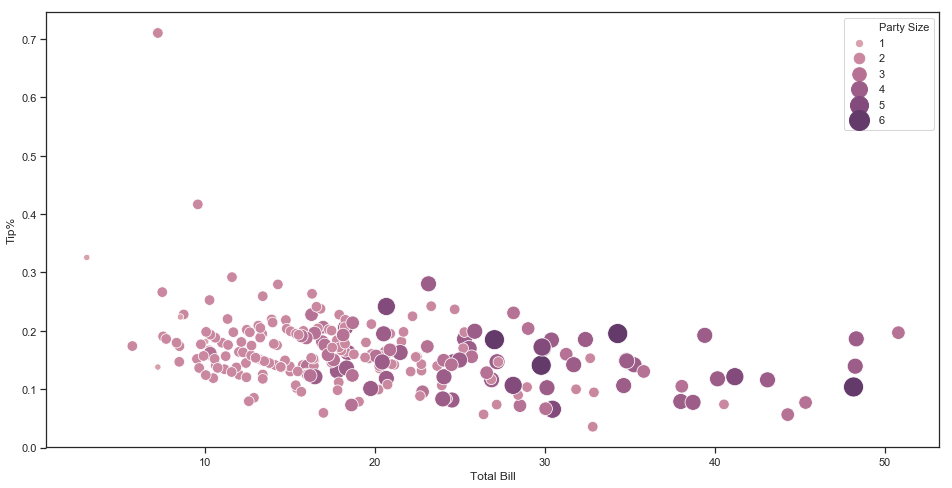

In [27]:
# Test if there is an association between the total bill and tip%. 
# Investigate whether bill size impacts tip ratio or if bigger groups tip with better ratios.
# adapted from https://seaborn.pydata.org/generated/seaborn.scatterplot.html 
# Resize the figure - taken from https://stackoverflow.com/a/53725768
plt.gcf().set_size_inches(16, 8)
# Use a different continuous color map:
cmap = sns.cubehelix_palette(dark=.3, light=.7, as_cmap=True) 
# Use scatterplot to plot the relationship between tip % and total bill 
# Use “Party Size” as the color to see the relationship between tip % and gender split by smoker. 
# Change the minimum and maximum point size and show all sizes in legend:
sns.scatterplot(x='Total Bill', y='Tip%', hue='Party Size', size='Party Size', sizes=(40, 400), palette=cmap,legend="full", data=df);

#### Interpretation of Results
* The tip % appears to decline as the total bill increases. 
* The tip % does not appear to be influenced by Party Size.

## 4. Linear Regression <a id='linear'></a>

In this section, I will briefly describe what regression is and the types of linear regression methodologies. I will explain how I used Simple Linear Regression to determine whether there is a relationship between the total bill and tip amount, using Scikit-Learn, which is "one of the most popular machine learning libraries for Python" (Chauhan, 2019).

#### How regression works and when to use it. <a id='linear'></a>

According to Frost (2019), regression models can be used to predict changes to a dependent variable (y) given changes to one or more predictor variables (x). There are two types of Linear Regression methodologies:

1. Simple Linear Regression 
Simple linear regression algorithm identifies if there is a linear relationship between variables; x (input) and y(output), Chauhan (2019).  This relationship is represented in the form:  Y= ax + b 
Where 'b' is the intercept and 'a' is the slope of the line. The linear regression algorithm fits multiple lines on the data points and returns the line that results in the best fit (least error), (Chauhan, 2019).

2. Multiple Linear Regression
Multiple linear regression is used where there are more than two variables. In this scenario, the dependent variable(y) variable) is dependent upon more than one independent variables (Chauhan, 2019). A regression model involving multiple variables can be represented as:
y = b0 + a1b1 + a2b2 + a3b3 + … … anbn


### 4.1 Simple Linear Regression <a id='simple'></a>

Simple linear regression is used to identify a straight-line which best fits to data. 
Stojiljkovic (2019) outlines five basic steps in implementing linear regression:

1. Import the packages and classes.
2. Provide the data to analyse.
3. Create a regression model and fit it with the data.
4. Check the results of model fitting and decide whether to accept or reject the model.
5. Make predictions using the model.

#### 4.1.1 Import Packages and Classes

In [28]:
# The first step is to import the NumPy package and the class LinearRegression from sklearn.linear_model
# The class sklearn.linear_model.LinearRegression will be used to perform linear regression using the Ordinary Least Squares model to fit this data and construct the best-fit line
# adapted from https://realpython.com/linear-regression-in-python/
import numpy as np
from sklearn.linear_model import LinearRegression

#### 4.1.2 Provide Data
The second step is defining data you wish to analyse. This involves defining the input (predictor variable, the x) and output (dependent variable, the 𝑦), these variables should be in the form of NumPy arrays (Stojiljkovic, 2019).

In [29]:
# As I want to predict the Tip value depending upon the Total Bill value recorded. 
# The variables I selected are “Total Bill” column which is stored in the X variable, and the “Tip” column which is stored in y variable.

# Create array consisting of the two columns; x and y variables
predictors = df[['Total Bill', 'Tip']]
# display shape
predictors.shape
# print the shape of the array ie 244 rows, 2 columns.

(244, 2)

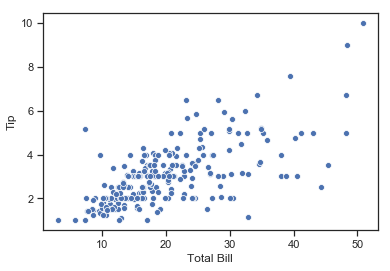

In [30]:
# Create a simple scatterplot to visualize the data
sns.scatterplot(x='Total Bill', y='Tip', sizes=(40, 400), palette=cmap,legend="full", data=predictors)
# print scatterplot

In [31]:
# Solution adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
# Convert the input variable 'Total Bill' into an array XX: 
XX = np.asarray(predictors['Total Bill']) # https://docs.scipy.org/doc/numpy/reference/generated/numpy.asarray.html
# Convert 1 array XX into 2D array called X2 in the shape of a column vector by inserting an axis along second dimension
X2 = XX[:, np.newaxis] # https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
# Print shape of X2 array
X2.shape

(244, 1)

In [32]:
y2 = predictors['Tip']
y2.shape

(244,)

#### 4.1.3 Create a regression model and fit it 

In [33]:
# Create an instance of the class LinearRegression, called model representing the regression model: https://realpython.com/linear-regression-in-python/

# Define Parameters 
    # Define the parameters of the regression model, source https://realpython.com/linear-regression-in-python/
    # fit_intercept=True , the y-intercept will be determined by the line of best fit. https://stackoverflow.com/a/46781428
    # normalize is a Boolean (False by default) that decides whether to normalize the input variables (True) or not (False).
    # copy_X is a Boolean (True by default) that decides whether to copy (True) or overwrite the input variables (False).
    # n_jobs is an integer or None (default) and represents the number of jobs used in parallel computation. None usually means one job and -1 to use all processors.

# call .fit() on model: https://realpython.com/linear-regression-in-python/
# 
model = LinearRegression(fit_intercept=True).fit(X2, y2)
# Print Model
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### 4.1.4 Get Results

In [34]:
r_sq = model.score(X2, y2)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.45661658635167657


In [35]:
# Regression coefficients - adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
# Regression coefficients are estimates of the unknown population parameters and describe the relationship between a predictor variable and the response. 
# In linear regression, coefficients are the values that multiply the predictor values. 
# Use sklearn coef function to display the coefficient for the line of best fit taken from 'model'
r_coef = model.coef_
print('regression coefficient (slope):', r_coef)

regression coefficient (slope): [0.10502452]


In [36]:
constant = model.intercept_
print('y intercept:', constant)

y intercept: 0.9202696135546731


#### 4.1.5 Predict response
Once you are happy with the model, the next step is to predict the response using some test data

In [37]:
# Create test data 
# Generate 244 samples in range 0 to 51 (which approximates range of bills) using NumPy Random Randint function
# adapted from https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis
Xfit = np.random.randint(51,size=(244))
# astype is used to convert integers to floats in Pandas DataFrame: https://datatofish.com/integer-to-float-dataframe/
Xfit.astype(float)
# Convert 1D array Xfit into 2D array in the shape of a column vector by inserting an axis along second dimension
Xfit = Xfit[:, np.newaxis] # https://medium.com/@ian.dzindo01/what-is-numpy-newaxis-and-when-to-use-it-8cb61c7ed6ae
# display the shape of an array Xfit
Xfit.shape # adapted from https://stackoverflow.com/a/10200284


(244, 1)

In [38]:
# To obtain the predicted response, use .predict(): https://realpython.com/linear-regression-in-python/
yfit = (model.predict(Xfit))
print('predicted response:', yfit, sep='\n')
# Answer

predicted response:
[1.76046575 3.33583351 1.65544124 2.49563737 3.44085803 5.96144645
 4.17602965 5.22627483 4.70115224 2.0755393  1.86549027 3.65090707
 5.6463729  1.13031865 2.60066189 5.43632386 5.01622579 2.49563737
 4.70115224 5.54134838 3.02075996 1.86549027 1.34036768 4.17602965
 6.17149548 1.76046575 1.02529413 5.96144645 3.230809   2.39061286
 6.06647097 3.96598062 2.18056382 4.38607869 2.70568641 2.91573544
 3.12578448 1.55041672 2.49563737 2.28558834 1.23534317 2.70568641
 5.01622579 5.96144645 1.4453922  4.38607869 2.91573544 3.8609561
 1.23534317 3.44085803 5.33129934 3.33583351 2.39061286 3.8609561
 3.33583351 3.33583351 4.4911032  3.02075996 1.97051479 5.54134838
 3.02075996 5.43632386 4.07100514 4.91120127 2.39061286 2.81071093
 4.17602965 5.96144645 1.23534317 4.70115224 5.33129934 3.02075996
 1.86549027 5.43632386 0.92026961 0.92026961 3.02075996 5.75139741
 4.17602965 4.28105417 6.17149548 3.12578448 5.96144645 1.23534317
 0.92026961 4.38607869 4.28105417 1.02529413

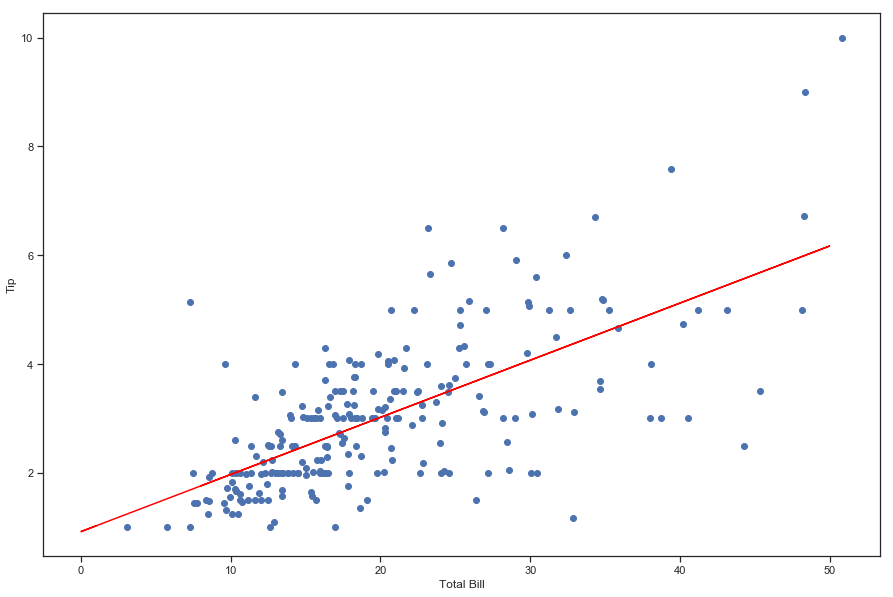

In [39]:
# Visualize the results

# Resize Plot to creates a figure with 15 (width) x 10 (height) inches - Adapted from https://stackoverflow.com/a/36368418
plt.figure(figsize=(15,10))
plt.xlabel('Total Bill') # Label x Axis 
plt.ylabel('Tip') # Label y Axis 

# Create a scatter plot of X2 and y2 and plot the regression line which is the predicted response when data is input into the regression model
plt.scatter(X2, y2)
plt.plot(Xfit, yfit,color="red")
plt.show()

### 4.2 Regression analysis <a id='regression'></a>

#### Regression Coefficient (Slope)

1. According to Frost (2019), the sign of regression coefficient indicates the direction of the relationship between a predictor variable and the dependent variable. When the sign is positive it means that an increase in the predictor variable leads to an increase in the dependent variable. A negative sign means that as the predictor variable increases in value, the dependent variable decreases in value. 

    * In this case, the regression coefficient sign is positive. This indicates that as the Total Bill increases, the response variable (Tip) also increases. 
    
2. The regression coefficient value represents "the mean change in the response given a one unit change in the predictor" (Frost, 2019). 
    * In this case, the regression coefficient value 0.10502452, means that for every dollar increase in Total Bill, the Tip is predicted to be 10.5% higher. 

#### Coefficient of Determination

The coefficient of determination (denoted by R2) measure how well the regression model fits the data. This metric is useful and decide whether to accept or reject the model of regression analysis used. R2 represents the proportion of the variance in the dependent variable that is predictable from the independent variable, (StatTrek, 2019). In linear regression, the coefficient of determination is equal to the square of the correlation between x and y scores.

* An R2 of 0 means that the y variable cannot be predicted from the x variable and the model should be rejected
* An R2 of 1 means the y variable can be predicted 100% of the time from the x variable and the model should be accepted.
* An R2 between 0 and 1 indicates the extent to which the y variable is predictable. The closer the R2 is to 1, the lower the error in predicting Y from X. The lower the R2 value is, the greater the error (variance).

Analysis of the R2 Score:

    * An R2 of 0.45661658635167657 means that 45.66 percent of the variance in Y is predictable from X.
    * While the R2 value is low, this result compares well with other studies which attempt to predict human behaviour, where R2 values are typically less than 50% (Minitab, 2019)

#### Conclusion

The model is accepted and the model has determined there is a positive relationship between the total bill and tip amount, that is to say that as the Total Bill increases, the Tip value also increases.

## 5.0 References <a id='references'></a>
   1. Eargle, D (2016) *Data Mining Assignment – Tips* [Online] Available at:https://daveeargle.com/assignments/data-mining/restaurant-tip-ratios.docx [Accessed 19 Oct 2019]
   1. Bryant, P. G. and Smith, M (1995) *Practical Data Analysis: Case Studies in Business Statistics* Homewood, IL: Richard D. Irwin Publishing.
   1. Waskom, M (2014) *seaborn-data* [Online] Available at:https://github.com/mwaskom/seaborn-data/blob/master/tips.csv [Accessed 18 Oct 2019]
   2. Computer Hope (2018) *How To Create A CSV File* [Online] Available at: https://www.computerhope.com/jargon/n/newline.htm [Accessed 1 April 2019].
   3. Glen, S (2014) *Pearson Mode Skewness* [Online] Available at:https://www.statisticshowto.datasciencecentral.com/pearson-mode-skewness/ [Accessed 18 Oct 2019]
   4. McLoughlin, I (2019) *Descriptive Statistics and Plots with Pandas* [Online] Available at:https://web.microsoftstream.com/video/ecc9ce4a-c6f5-4c50-a4f4-29116fc21b81?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D689 [Accessed 18 Oct 2019]
   1. McKinney, W (2019) *Wes McKinney: pandas in 10 minutes | Walkthrough* [Online] Available at:https://www.youtube.com/watch?foo=bar&v=_T8LGqJtuGc [Accessed 19 Oct 2019]
   1. McKinney, W (2012) *Python for Data Analysis* 1st Ed. O’Reilly Media, Inc.
   1. Haunschmid, V (2017) *How to make inline plots in Jupyter Notebook larger?* [Online] Available at:https://stackoverflow.com/a/36368418 [Accessed 26 Oct 2019]
   1. Willems, K (2017) *Python Exploratory Data Analysis Tutorial* [Online] Available at:https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python [Accessed 26 Oct 2019]
   1. Bundock, V (2019) *R Week 4 Assignment - Charting Tips* [Online] Available at:http://rstudio-pubs-static.s3.amazonaws.com/128623_507fbe51532748f29278825fceedab85.html [Accessed 26 Oct 2019]
   1. geeksforgeeks.org (2019) *Python | Pandas dataframe.groupby()* [Online] Available at:https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/ [Accessed 10 Nov 2019]
   1. Frost, J (2019) *Regression coefficients* [Online] Available at:https://statisticsbyjim.com/glossary/regression-coefficient/ [Accessed 17 Nov 2019]
   1. Chauhan, N (2019) *A beginner’s guide to Linear Regression in Python with Scikit-Learn* [Online] Available at:https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f [Accessed 17 Nov 2019]
   1. StatTrek.com (2019) *Coefficient of Determination* [Online] Available at:https://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination [Accessed 19 Nov 2019]
   1. Stojiljkovic, M (2019) *Simple Linear Regression With scikit-learn* [Online] Available at:https://realpython.com/linear-regression-in-python/ [Accessed 19 Nov 2019]
   1. Minitab.com (2019) *Regression Analysis: How Do I Interpret R-squared and Assess the Goodness-of-Fit?* [Online] Available at:https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit [Accessed 19 Nov 2019]
   1. Waskom, M (2018) *Visualizing statistical relationships* [Online] Available at:https://seaborn.pydata.org/tutorial/relational.html [Accessed 23 Nov 2019]
   1. Statsmakemecry.com (2012) *Confusing Stats Terms Explained: Heteroscedasticity (Heteroskedasticity)* [Online] Available 
   http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html [Accessed 23 Nov 2019]